# DATA SCIENCE FOR GOOD
## Data Preprocessing

Importing the necessary libraries.

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
# import geopandas as gpd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

Importing and reading the relevant datasets with pandas library. The links are given in a way that corresponds to the project structure.

In [142]:
interview_ds = pd.read_csv('../Dept_24-00013/24-00013_UOF_2008-2017_prepped.csv')
employment_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_employment/ACS_15_5YR_S2301_with_ann.csv')
edu_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_education-attainment/ACS_15_5YR_S1501_with_ann.csv')
edu25_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_education-attainment-over-25/ACS_15_5YR_B15003_with_ann.csv')
ownerhousing_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_owner-occupied-housing/ACS_15_5YR_S2502_with_ann.csv')
poverty_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_poverty/ACS_15_5YR_S1701_with_ann.csv')
income_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_income/ACS_15_5YR_S1903_with_ann.csv')
race_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_race-sex-age/ACS_15_5YR_DP05_with_ann.csv')


In [143]:
interview_ds.head(10)

,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
0,X,Y,PoliceUseOfForceID,ResponseDate,NaN,SubjectInjury,ForceTypeDetail,ForceTypeAction,Race,Sex,EventAge,TypeOfResistance,Precinct
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,-1,BodilyForceType,Push Away,Black,Female,25,Assaulted Officer,2
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,-1,BodilyForceType,Body Weight to Pin,Black,Female,25,Assaulted Officer,2
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,-1,BodilyForceType,Punches,Black,Female,25,Assaulted Officer,2
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,0,BodilyForceType,Joint Lock,White,Male,27,Commission of Crime,3
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,0,BodilyForceType,Body Weight to Pin,White,Male,27,Commission of Crime,3
6,-93.24701977,44.95974418,6,2008-01-01,01:27:27.000Z,0,TaserDeployed,Firing Darts,White,Male,27,Commission of Crime,3
7,-93.27314066,44.98080828,7,2008-01-01,01:29:47.000Z,NaN,BodilyForceType,Push Away,White,Male,39,Commission of Crime,1
8,-93.27314066,44.98080828,8,2008-01-01,01:29:47.000Z,NaN,BodilyForceType,Body Weight to Pin,White,Male,39,Commission of Crime,1
9,-93.27310907,44.97918668,9,2008-01-01,01:40:02.000Z,NaN,BodilyForceType,Joint Lock,White,Male,42,Tensed,1



Creating a single dataset (new_df) from the existing ones (employment_ds, edu_ds, edu25_ds, ownerhousing_ds, poverty_ds, income_ds, race_ds).


In [144]:
new_df = pd.concat([employment_ds, edu_ds, edu25_ds, ownerhousing_ds, poverty_ds, income_ds, race_ds], axis=1, sort=False)
new_df.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,HC03_VC108,HC04_VC108,HC01_VC109,HC02_VC109,HC03_VC109,HC04_VC109,HC01_VC110,HC02_VC110,HC03_VC110,HC04_VC110
0,Id,Id2,Geography,Total; Estimate; Population 16 years and over,Total; Margin of Error; Population 16 years an...,Labor Force Participation Rate; Estimate; Popu...,Labor Force Participation Rate; Margin of Erro...,Employment/Population Ratio; Estimate; Populat...,Employment/Population Ratio; Margin of Error; ...,Unemployment rate; Estimate; Population 16 yea...,...,"Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P...","Estimate; CITIZEN, VOTING AGE POPULATION - Cit...","Margin of Error; CITIZEN, VOTING AGE POPULATIO...","Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P...","Estimate; CITIZEN, VOTING AGE POPULATION - Cit...","Margin of Error; CITIZEN, VOTING AGE POPULATIO...","Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P..."
1,1400000US27053000101,27053000101,"Census Tract 1.01, Hennepin County, Minnesota",2481,253,72.1,4.6,66.2,6.0,8.2,...,2082,(X),1058,126,50.8,4.9,1024,152,49.2,4.9
2,1400000US27053000102,27053000102,"Census Tract 1.02, Hennepin County, Minnesota",3856,262,65.4,6.9,60.5,6.8,7.5,...,3435,(X),1611,177,46.9,3.6,1824,192,53.1,3.6
3,1400000US27053000300,27053000300,"Census Tract 3, Hennepin County, Minnesota",2676,197,76.7,5.0,70.2,5.0,8.5,...,2538,(X),1187,111,46.8,3.2,1351,122,53.2,3.2
4,1400000US27053000601,27053000601,"Census Tract 6.01, Hennepin County, Minnesota",4114,346,77.9,4.7,74.2,4.9,4.8,...,3741,(X),1902,242,50.8,4.4,1839,185,49.2,4.4


In [145]:
new_df.shape # Looking at the shape of the dataset.

(300, 2103)

In [146]:
new_df.columns # Looking into the columns as the information given.

Index(['GEO.id', 'GEO.id2', 'GEO.display-label', 'HC01_EST_VC01',
       'HC01_MOE_VC01', 'HC02_EST_VC01', 'HC02_MOE_VC01', 'HC03_EST_VC01',
       'HC03_MOE_VC01', 'HC04_EST_VC01',
       ...
       'HC03_VC108', 'HC04_VC108', 'HC01_VC109', 'HC02_VC109', 'HC03_VC109',
       'HC04_VC109', 'HC01_VC110', 'HC02_VC110', 'HC03_VC110', 'HC04_VC110'],
      dtype='object', length=2103)

Substituting the missing data with the NaN format.

In [147]:
new_df = new_df.where(new_df!='(X)', None)
new_df.head(2)

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,HC03_VC108,HC04_VC108,HC01_VC109,HC02_VC109,HC03_VC109,HC04_VC109,HC01_VC110,HC02_VC110,HC03_VC110,HC04_VC110
0,Id,Id2,Geography,Total; Estimate; Population 16 years and over,Total; Margin of Error; Population 16 years an...,Labor Force Participation Rate; Estimate; Popu...,Labor Force Participation Rate; Margin of Erro...,Employment/Population Ratio; Estimate; Populat...,Employment/Population Ratio; Margin of Error; ...,Unemployment rate; Estimate; Population 16 yea...,...,"Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P...","Estimate; CITIZEN, VOTING AGE POPULATION - Cit...","Margin of Error; CITIZEN, VOTING AGE POPULATIO...","Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P...","Estimate; CITIZEN, VOTING AGE POPULATION - Cit...","Margin of Error; CITIZEN, VOTING AGE POPULATIO...","Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P..."
1,1400000US27053000101,27053000101,"Census Tract 1.01, Hennepin County, Minnesota",2481,253,72.1,4.6,66.2,6.0,8.2,...,2082,None,1058,126,50.8,4.9,1024,152,49.2,4.9


In [148]:
new_df.columns = new_df.iloc[0] # Replacing the existing headers with the relevant columns' names (those of the first row).
new_df.drop([0], axis=0, inplace=True) # dropping the first line of the dataset as it contains the headers
new_df.head()

,Id,Id2,Geography,Total; Estimate; Population 16 years and over,Total; Margin of Error; Population 16 years and over,Labor Force Participation Rate; Estimate; Population 16 years and over,Labor Force Participation Rate; Margin of Error; Population 16 years and over,Employment/Population Ratio; Estimate; Population 16 years and over,Employment/Population Ratio; Margin of Error; Population 16 years and over,Unemployment rate; Estimate; Population 16 years and over,...,"Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female"
1,1400000US27053000101,27053000101,"Census Tract 1.01, Hennepin County, Minnesota",2481,253,72.1,4.6,66.2,6.0,8.2,...,2082,None,1058,126,50.8,4.9,1024,152,49.2,4.9
2,1400000US27053000102,27053000102,"Census Tract 1.02, Hennepin County, Minnesota",3856,262,65.4,6.9,60.5,6.8,7.5,...,3435,None,1611,177,46.9,3.6,1824,192,53.1,3.6
3,1400000US27053000300,27053000300,"Census Tract 3, Hennepin County, Minnesota",2676,197,76.7,5.0,70.2,5.0,8.5,...,2538,None,1187,111,46.8,3.2,1351,122,53.2,3.2
4,1400000US27053000601,27053000601,"Census Tract 6.01, Hennepin County, Minnesota",4114,346,77.9,4.7,74.2,4.9,4.8,...,3741,None,1902,242,50.8,4.4,1839,185,49.2,4.4
5,1400000US27053000603,27053000603,"Census Tract 6.03, Hennepin County, Minnesota",2227,119,77.6,4.7,76.0,4.9,2.1,...,2146,None,1015,83,47.3,3.0,1131,92,52.7,3.0


Checking the number of missing values in the dataset, considering that the maximum number is 300.

In [149]:
new_df.isnull().sum(axis=0)

0
Id                                                                                                                                                                                       0
Id2                                                                                                                                                                                      0
Geography                                                                                                                                                                                0
Total; Estimate; Population 16 years and over                                                                                                                                            0
Total; Margin of Error; Population 16 years and over                                                                                                                                     0
Labor Force Participation Rate; Estimate; Population 16 years a

In [150]:
new_df.isnull().sum(axis=0).max()

299

Dropping all the columns that have more than 200 missing values.

In [151]:
new_df1 = new_df.dropna(axis=1, thresh=200)
new_df1.head()

,Id,Id2,Geography,Total; Estimate; Population 16 years and over,Total; Margin of Error; Population 16 years and over,Labor Force Participation Rate; Estimate; Population 16 years and over,Labor Force Participation Rate; Margin of Error; Population 16 years and over,Employment/Population Ratio; Estimate; Population 16 years and over,Employment/Population Ratio; Margin of Error; Population 16 years and over,Unemployment rate; Estimate; Population 16 years and over,...,"Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female"
1,1400000US27053000101,27053000101,"Census Tract 1.01, Hennepin County, Minnesota",2481,253,72.1,4.6,66.2,6.0,8.2,...,191,2082,1058,126,50.8,4.9,1024,152,49.2,4.9
2,1400000US27053000102,27053000102,"Census Tract 1.02, Hennepin County, Minnesota",3856,262,65.4,6.9,60.5,6.8,7.5,...,276,3435,1611,177,46.9,3.6,1824,192,53.1,3.6
3,1400000US27053000300,27053000300,"Census Tract 3, Hennepin County, Minnesota",2676,197,76.7,5.0,70.2,5.0,8.5,...,166,2538,1187,111,46.8,3.2,1351,122,53.2,3.2
4,1400000US27053000601,27053000601,"Census Tract 6.01, Hennepin County, Minnesota",4114,346,77.9,4.7,74.2,4.9,4.8,...,272,3741,1902,242,50.8,4.4,1839,185,49.2,4.4
5,1400000US27053000603,27053000603,"Census Tract 6.03, Hennepin County, Minnesota",2227,119,77.6,4.7,76.0,4.9,2.1,...,117,2146,1015,83,47.3,3.0,1131,92,52.7,3.0


Deleting the duplicating columns.

In [152]:
new_df1 = new_df1.T.drop_duplicates().T

Filling the missing data with the 'ffill' method.

In [153]:
new_df1 = new_df1.fillna(method='ffill')

Looking into the datatypes of the dataset. 

In [154]:
 new_df1.dtypes

0
Id                                                                                                                                                                                     object
Id2                                                                                                                                                                                    object
Geography                                                                                                                                                                              object
Total; Estimate; Population 16 years and over                                                                                                                                          object
Total; Margin of Error; Population 16 years and over                                                                                                                                   object
Labor Force Participation Rate; Estimate; Popula

## Looking into the second dataset.
 

In [155]:
interview_ds.shape # Checking the shape of the dataset

(25802, 13)

In [156]:
interview_ds.columns # Checking the columns for the information available

Index(['LOCATION_LONGITUDE', 'LOCATION_LATITUDE', 'INCIDENT_UNIQUE_IDENTIFIER',
       'INCIDENT_DATE', 'INCIDENT_TIME', 'SUBJECT_INJURY',
       'TYPE_OF_FORCE_USED', 'WEAPON_OR_TOOL_USED', 'SUBJECT_RACE',
       'SUBJECT_GENDER', 'SUBJECT_AGE', 'REASON_FOR_FORCE',
       'LOCATION_DISTRICT'],
      dtype='object')

Checking the number of missing values per column considering that the total number of values is 25802. 

In [157]:
interview_ds.isnull().sum(axis=0) # Checking the null values per column

LOCATION_LONGITUDE               0
LOCATION_LATITUDE                0
INCIDENT_UNIQUE_IDENTIFIER       0
INCIDENT_DATE                    0
INCIDENT_TIME                    1
SUBJECT_INJURY                7659
TYPE_OF_FORCE_USED             957
WEAPON_OR_TOOL_USED              0
SUBJECT_RACE                   957
SUBJECT_GENDER                 957
SUBJECT_AGE                    958
REASON_FOR_FORCE               961
LOCATION_DISTRICT              957
dtype: int64

Dropping the columns containing more than 7000 of missing values (SUBJECT_INJURY).

In [158]:
inter = interview_ds.drop(['SUBJECT_INJURY'], axis=1)


Replacing the existing headers with the relevant ones (located in the first row of the dataset).

In [159]:
inter.columns = inter.iloc[0] # Replacing the existing headers with the relevant columns' names (those of the first row).
inter.drop([0], axis=0, inplace=True) # dropping the first line of the dataset as it contains the headers
inter.head()

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Sex,EventAge,TypeOfResistance,Precinct
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,BodilyForceType,Push Away,Black,Female,25,Assaulted Officer,2
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,BodilyForceType,Body Weight to Pin,Black,Female,25,Assaulted Officer,2
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,BodilyForceType,Punches,Black,Female,25,Assaulted Officer,2
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,BodilyForceType,Joint Lock,White,Male,27,Commission of Crime,3
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,BodilyForceType,Body Weight to Pin,White,Male,27,Commission of Crime,3


Filling the missing value using the 'ffill' method.

In [160]:
inter = inter.fillna(method='ffill')

Transforming the categorical data into the numerical one using LabelEncoder.

In [161]:
l_e = LabelEncoder()
inter.ForceTypeDetail = l_e.fit_transform(inter.ForceTypeDetail)
inter.Race = l_e.fit_transform(inter.Race)
inter.Sex = l_e.fit_transform(inter.Sex)
inter.ForceTypeAction = l_e.fit_transform(inter.ForceTypeAction)
inter.TypeOfResistance = l_e.fit_transform(inter.TypeOfResistance)

In [162]:
inter.rename(columns={'Sex' : 'Male'}, inplace=True) 

# Changing the name of the column so that 1 = Male looks more obvious

data=inter
inter.head()

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Male,EventAge,TypeOfResistance,Precinct
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,1,29,1,0,25,0,2
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,1,4,1,0,25,0,2
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,1,28,1,0,25,0,2
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,1,17,6,1,27,4,3
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,1,4,6,1,27,4,3


Changing the type of data.

In [212]:
data.dtypes

0
X                      object
Y                      object
PoliceUseOfForceID     object
ResponseDate           object
NaN                    object
ForceTypeDetail       float64
ForceTypeAction       float64
Race                  float64
Male                  float64
EventAge              float64
TypeOfResistance      float64
Precinct              float64
dtype: object

In [213]:
for i in data.columns[5:]:
    data[i] = data[i].astype(float)
data.EventAge.dtype

dtype('float64')

Transforming the data into binary format by using dummies.

In [163]:
d = [5,6,7,10,11]
for i in d:
    n = pd.get_dummies(inter[inter.columns[i]])
    inter = pd.concat([inter, n], axis=1)
inter.head()
    

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Male,EventAge,...,10,11,12,13,0,1,2,3,4,5
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,1,29,1,0,25,...,0,0,0,0,0,0,1,0,0,0
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,1,4,1,0,25,...,0,0,0,0,0,0,1,0,0,0
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,1,28,1,0,25,...,0,0,0,0,0,0,1,0,0,0
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,1,17,6,1,27,...,0,0,0,0,0,0,0,1,0,0
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,1,4,6,1,27,...,0,0,0,0,0,0,0,1,0,0


In [233]:
for i in inter.columns[5:]:
    inter[i] = inter[i].astype(float)
inter.EventAge.dtype

dtype('float64')

Checking the type of the data in the dataset.

In [164]:
inter.dtypes

X                     object
Y                     object
PoliceUseOfForceID    object
ResponseDate          object
NaN                   object
ForceTypeDetail        int64
ForceTypeAction        int64
Race                   int64
Male                   int64
EventAge              object
TypeOfResistance       int64
Precinct              object
0                      uint8
1                      uint8
2                      uint8
3                      uint8
4                      uint8
5                      uint8
6                      uint8
7                      uint8
8                      uint8
0                      uint8
1                      uint8
2                      uint8
3                      uint8
4                      uint8
5                      uint8
6                      uint8
7                      uint8
8                      uint8
                       ...  
35                     uint8
36                     uint8
0                      uint8
1             

Changing the data type into the datetime format. 

In [165]:
inter.ResponseDate = pd.to_datetime(inter.ResponseDate, format='%Y-%m-%d')

In [166]:
k = inter.iloc[:,4]
k.rename('Time', inplace=True)
# inter = pd.concat(inter.drop(inter.columns[4], axis=1),k)
inter.head()

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Male,EventAge,...,10,11,12,13,0,1,2,3,4,5
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,1,29,1,0,25,...,0,0,0,0,0,0,1,0,0,0
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,1,4,1,0,25,...,0,0,0,0,0,0,1,0,0,0
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,1,28,1,0,25,...,0,0,0,0,0,0,1,0,0,0
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,1,17,6,1,27,...,0,0,0,0,0,0,0,1,0,0
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,1,4,6,1,27,...,0,0,0,0,0,0,0,1,0,0


Dropping the missing values of the Male column.

In [203]:
inter.drop(labels= inter.loc[inter['Male']==2].index,axis=0, inplace=True)
inter.drop(labels = inter.loc[inter['Male']==3].index,axis=0, inplace=True)
inter.shape

(25527, 86)

Dividing the data into the training and the test sets.

In [228]:
ind_col_names = [x for x in inter if x!= 'Precinct'] #setting the parameters, choosing the target for interview ds
# ind_col_names1 = [x for x in new_df1 if x = ''] #setting the parameters, choosing the target for the major table
X = inter[ind_col_names]
y = inter.Precinct

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=17)

## Data Analysis 

In [206]:
data.head()

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Male,EventAge,TypeOfResistance,Precinct
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,1.0,29.0,1.0,0.0,25.0,0.0,2.0
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,1.0,4.0,1.0,0.0,25.0,0.0,2.0
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,1.0,28.0,1.0,0.0,25.0,0.0,2.0
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,1.0,17.0,6.0,1.0,27.0,4.0,3.0
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,1.0,4.0,6.0,1.0,27.0,4.0,3.0


In [231]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
ForceTypeDetail,25801.0,1.998256,2.163733,0.0,1.0,1.0,2.0,8.0
ForceTypeAction,25801.0,16.209527,10.428783,0.0,4.0,17.0,27.0,36.0
Race,25801.0,2.433355,2.181615,0.0,1.0,1.0,6.0,7.0
Male,25801.0,0.891438,0.383826,0.0,1.0,1.0,1.0,3.0
EventAge,25801.0,28.065734,10.752120,0.0,21.0,26.0,34.0,77.0
TypeOfResistance,25801.0,6.052672,2.964907,0.0,4.0,6.0,8.0,13.0
Precinct,25801.0,2.703151,1.441084,0.0,1.0,3.0,4.0,5.0


Checking the distribution of the types of Force used.

Text(0.5, 0, 'frequency')

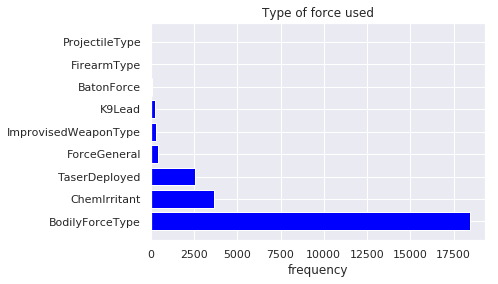

In [232]:
plt.barh(l['ForceTypeDetail'].value_counts().index, l['ForceTypeDetail'].value_counts(), align='center',
        color='blue', ecolor='black')
plt.title('Type of force used')
plt.xlabel('frequency')


Checking the distribution of Age according to Races and Precincts

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



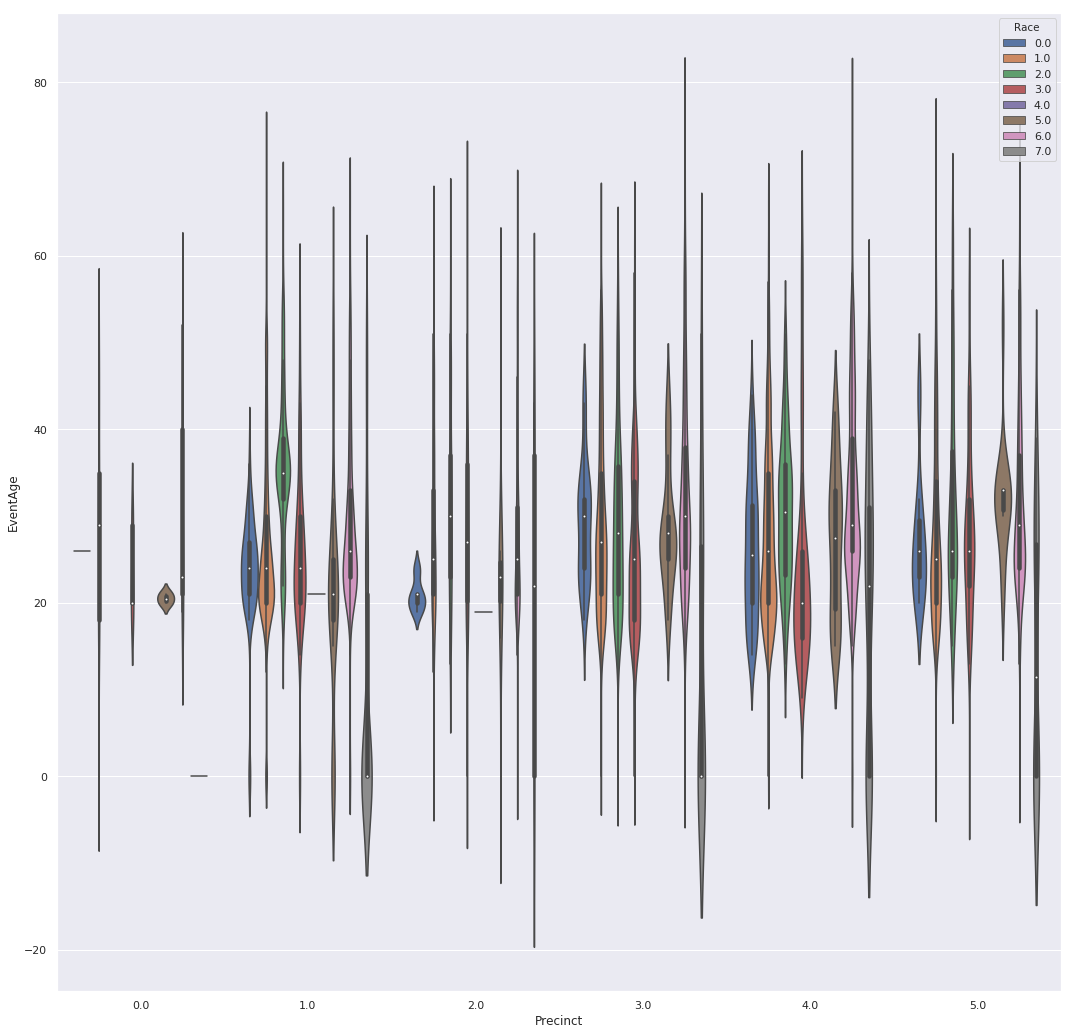

In [225]:
import seaborn as sns
#sns.set()
# with sns.axes_style(style='ticks'):
fig, ax = plt.subplots(figsize=(2^16, 2^16))
s = sns.catplot(ax=ax, x = 'Precinct', y = 'EventAge', data = data, hue = 'Race', kind="violin")
plt.close(s.fig)

Plotting Race distribution.

In [215]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='stasya00', api_key='Vre2UuKcEWvUr1B0YqAs')
trace = go.Pie(labels=inter['Race'].value_counts().index, values=inter['Race'].value_counts())
py.iplot([trace], filename='basic_pie_chart')



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~stasya00/0 or inside your plot.ly account where it is named 'basic_pie_chart'


Checking the correlations between the values.

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



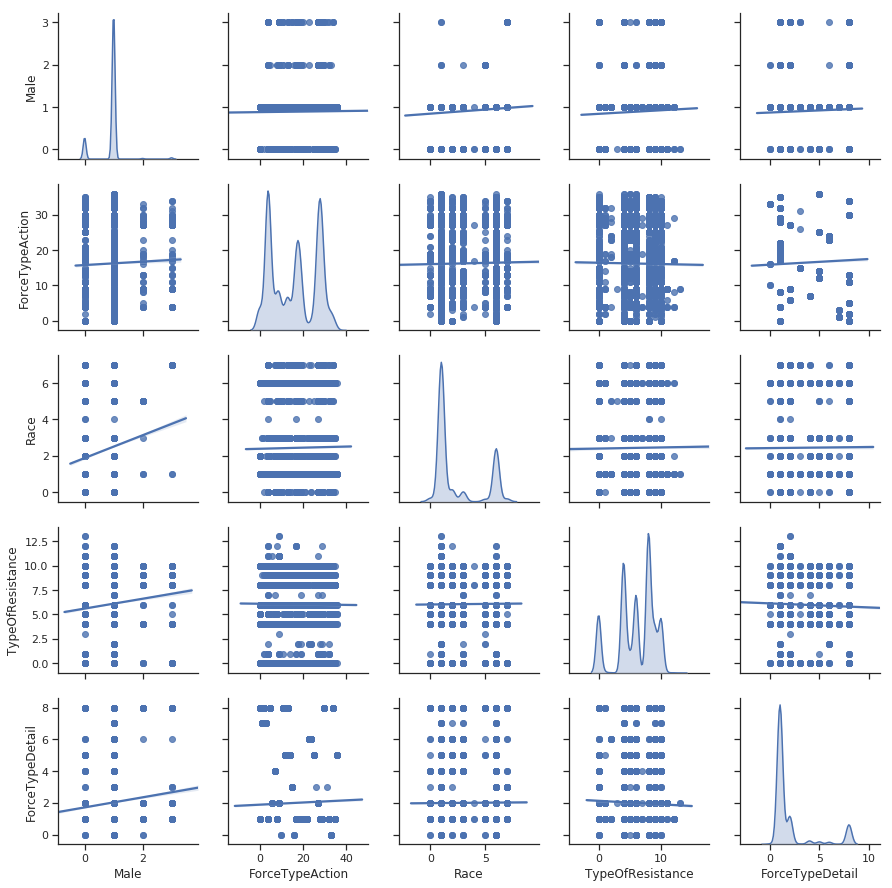

In [217]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 
sns.set(style="ticks", color_codes=True)
sns.pairplot(data[['Male', 'ForceTypeAction', 'Race', 'TypeOfResistance', 'ForceTypeDetail']], diag_kind="kde", kind = 'reg');

 Plotting second dataset.